In [1]:
import requests
import time

iss_data = []

for i in range(1,101):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")

    if response.status_code == 200:
        data = response.json()  # Convert to dictionary
        latitude = data["latitude"]
        longitude = data["longitude"]
        timestamp = data["timestamp"]

        # Add data point to the list
        iss_data.append({"latitude": latitude, "longitude": longitude,"timestamp": timestamp
        })

        print(f"{i}.  Lat: {latitude}, Lon: {longitude}, Time: {timestamp}")

    else:
        print(f"{i}.  Error")

    time.sleep(10)  # Wait 10 seconds before the next run

1.  Lat: 14.349755955778, Lon: -74.492485906354, Time: 1751630726
2.  Lat: 13.750152929783, Lon: -74.031743017408, Time: 1751630738
3.  Lat: 13.199573452068, Lon: -73.611678922604, Time: 1751630749
4.  Lat: 12.648130811113, Lon: -73.193696921628, Time: 1751630760
5.  Lat: 12.045625385378, Lon: -72.739982627876, Time: 1751630772
6.  Lat: 11.492513868551, Lon: -72.326050139926, Time: 1751630783
7.  Lat: 10.888283503512, Lon: -71.87652963471, Time: 1751630795
8.  Lat: 10.283225909513, Lon: -71.429020126895, Time: 1751630807
9.  Lat: 9.7279096132421, Lon: -71.020470791066, Time: 1751630818
10.  Lat: 9.0708381328403, Lon: -70.53956617609, Time: 1751630831
11.  Lat: 8.5142319650929, Lon: -70.134173616375, Time: 1751630842
12.  Lat: 7.9064240711222, Lon: -69.693414770334, Time: 1751630854
13.  Lat: 7.3487513567147, Lon: -69.290651122934, Time: 1751630865
14.  Lat: 6.7398681165204, Lon: -68.852550373774, Time: 1751630877
15.  Lat: 6.1812897652812, Lon: -68.452032369042, Time: 1751630888
16.  L

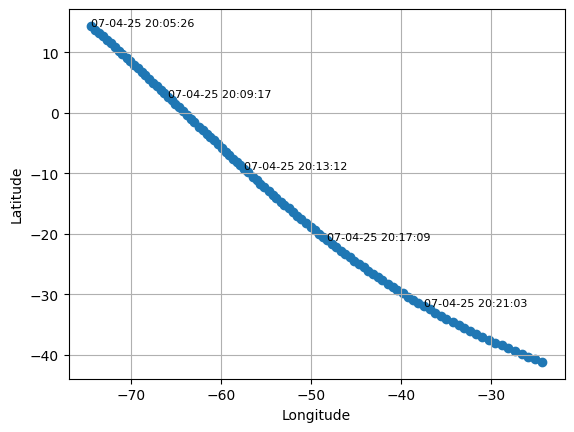

In [2]:
import matplotlib.pyplot as plt
import datetime

x = [point["longitude"] for point in iss_data]
y = [point["latitude"] for point in iss_data]   
t = [point["timestamp"] for point in iss_data]

# plot the data
plt.scatter(x, y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

# label every 20th timestamp

converted_time = [datetime.datetime.fromtimestamp(timestamp).strftime('%m-%d-%y %H:%M:%S') for timestamp in t]

for i in range(len(x)): 
    if i % 20 == 0:  
        plt.text(x[i], y[i], converted_time[i], fontsize=8)

plt.show()
